# **Example 1** Search and read EarthCARE data

In [1]:

#!pip install earthcarekit
import os
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

In [2]:
import earthcarekit as eck

## Requirements

EarthCARE files:
- `ATL_NOM_1B` frame 01508B
- `ATL_EBD_2A` full orbit 5813 (frames A to H)

Place the file in the notebook's directory or within a subfolder.

If needed, you can (optionally) download the product by executing the following code block:

## Mounting google drive

In [3]:
from google.colab import drive
drive.mount("/content/drive")

DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/earthcare-amazon-2025/data"
OUT_DIR  = "/content/drive/MyDrive/Colab Notebooks/earthcare-amazon-2025/outputs"
CFG_DIR  = "/content/drive/MyDrive/Colab Notebooks/earthcare-amazon-2025"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Creating configuration for EarthCare package

In [4]:
# eck.create_example_config() #to create the configuration file for the first time
path_to_file_esa_config = CFG_DIR+"/example_config.toml"#Configuration file for the esa package
eck.set_config(path_to_file_esa_config)


Default config set at </root/.config/earthcarekit/default_config.toml>


In [47]:
print("Download required products:")
print("#######################################")
print("-> Download: ATL_NOM_1B frame 01508B")
eck.ecdownload(
    file_type="ATL_NOM_1B",
    orbit_and_frame="1508B",
    path_to_data=DATA_DIR,  # Select the notebook's folder as root directory
    is_create_subdirs=False,  # Don't create a nested subfolder structure for downloaded files
    is_overwrite=True,
)
print("#######################################")
print("-> Download: ATL_EBD_2A full orbit 5813")
eck.ecdownload(
    file_type="ATL_EBD_2A",
    orbit_number=5813,
    path_to_data=DATA_DIR,  # Select the notebook's folder as root directory
    is_create_subdirs=False,  # Don't create a nested subfolder structure for downloaded files
    is_overwrite=True,
)

Download required products:
#######################################
-> Download: ATL_NOM_1B frame 01508B
#======================================================================#
#                       EarthCARE Download Tool                        #
#                         earthcarekit 0.13.0                          #
#======================================================================#
# Settings
# - is_download=True
# - is_overwrite=True
# - is_unzip=True
# - is_delete=True
# - is_create_subdirs=False
# - is_log=False
# - is_debug=False
# - is_export_results=False
# - idx_selected_input=None
# - config_filepath=</root/.config/earthcarekit/default_config.toml>
# - data_dirpath=</content/drive/MyDrive/Colab Notebooks/earthcare-amazon-2025/data>

+----------------------------------------------------------------------+
| STEP 1/2 - Search products                       2025-12-16 02:01:27 |
+----------------------------------------------------------------------+

*[1/1] Search req

## **Example 1.1** Search files

In [35]:
print("Search products using different filters:")

df = eck.search_product(
    file_type="ATL_NOM_1B",
    orbit_and_frame="1508B",
    root_dirpath=DATA_DIR,  # Select the notebook's folder as root directory
)
print("- Results using 'orbit_and_frame':", df.name)

df = eck.search_product(
    file_type="ATL_NOM_1B",
    orbit_number=1508,
    frame_id="B",
    root_dirpath=DATA_DIR,  # Select the notebook's folder as root directory
)
print("- Results using 'orbit_number' and 'frame_id':", df.name)

df = eck.search_product(
    file_type="ATL_NOM_1B",
    timestamp="2024-09-02 21:05", # Returns products containing this timestamp
    root_dirpath=DATA_DIR,  # Select the notebook's folder as root directory
)
print("- Results using 'timestamp':", df.name)

df = eck.search_product(
    file_type="ATL_NOM_1B",
    start_time="20240902T21",
    end_time="20240902T2110",
    root_dirpath=DATA_DIR,  # Select the notebook's folder as root directory
)
print("- Results using 'start_time' and 'end_time':", df.name)

df = eck.search_product(
    file_type=["anom", "aebd"],
    orbit_number=[1508, 5813],
    frame_id=["A", "B", "C"],
    root_dirpath=DATA_DIR,  # Select the notebook's folder as root directory
)
print("- Results using lists:\n", df.name)

Search products using different filters:
- Results using 'orbit_and_frame': ['ECA_EXBA_ATL_NOM_1B_20240902T210023Z_20250630T151754Z_01508B']
- Results using 'orbit_number' and 'frame_id': ['ECA_EXBA_ATL_NOM_1B_20240902T210023Z_20250630T151754Z_01508B']
- Results using 'timestamp': ['ECA_EXBA_ATL_NOM_1B_20240902T210023Z_20250630T151754Z_01508B']
- Results using 'start_time' and 'end_time': ['ECA_EXBA_ATL_NOM_1B_20240902T210023Z_20250630T151754Z_01508B']
- Results using lists:
 ['ECA_EXBA_ATL_NOM_1B_20240902T210023Z_20250630T151754Z_01508B'
 'ECA_EXBA_ATL_EBD_2A_20250606T125109Z_20250929T183956Z_05813A'
 'ECA_EXBA_ATL_EBD_2A_20250606T130244Z_20250929T181219Z_05813B'
 'ECA_EXBA_ATL_EBD_2A_20250606T131431Z_20250929T181615Z_05813C']


## **Example 1.2** Read single files

In [48]:
print("Search products by orbit number and frame ID:")
df = eck.search_product(
    file_type="ATL_NOM_1B",
    orbit_and_frame="1508B",
    root_dirpath=DATA_DIR,  # Select the notebook's folder as root directory
)
print(df.name)


Search products by orbit number and frame ID:
['ECA_EXBA_ATL_NOM_1B_20240902T210023Z_20250630T151754Z_01508B']


In [53]:
import xarray as xr


In [55]:
ds

<xarray.Dataset> Size: 601MB
Dimensions:                                                         (
                                                                     along_track: 18486,
                                                                     height_raw: 256,
                                                                     background: 2,
                                                                     height: 254,
                                                                     segments: 6)
Dimensions without coordinates: along_track, height_raw, background, height,
                                segments
Data variables: (12/132)
    mie_raw_signal                                                  (along_track, height_raw) uint16 9MB ...
    rayleigh_raw_signal                                             (along_track, height_raw) uint16 9MB ...
    crosspolar_raw_signal                                           (along_track, height_raw) uint16 9MB ...
    mie_offset                                                      float32 4B ...
    rayleigh_offset                                                 float32 4B ...
    crosspolar_offset                                               float32 4B ...
    ...                                                              ...
    hot_pixel_flag_mie                                              (height) int8 254B ...
    hot_pixel_flag_crosspolar                                       (height) int8 254B ...
    hot_pixel_level_rayleigh                                        (height) float32 1kB ...
    hot_pixel_level_mie                                             (height) float32 1kB ...
    hot_pixel_level_crosspolar                                      (height) float32 1kB ...
    geoid_offset                                                    (along_track) float32 74kB ...

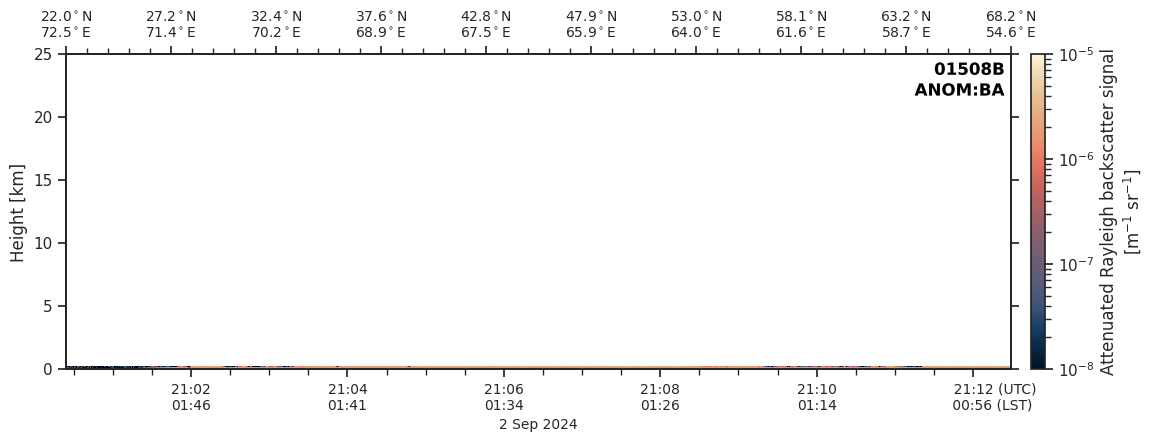

In [59]:

fp = df.filepath[0]  # Select file from ProductDataFrame
ds = xr.open_dataset(fp, group="ScienceData", engine="netcdf4")  # requires netCDF4

### Assigning coordanates becase the CurtainFigure() method requires latitude, longitude dimensions
ds = ds.assign_coords(
    latitude=ds["ellipsoid_latitude"],
    longitude=ds["ellipsoid_longitude"],
)
#################
cf = eck.CurtainFigure()
cf.ecplot(
    ds=ds,
    #var="mie_attenuated_backscatter",
    var="rayleigh_attenuated_backscatter",
    height_range=(0, 25e3),
)

ds.close()

## **Example 1.3** Read consecutive files or a full orbit

> 💡 Note:
> When reading multiple products with `read_products()`, the resulting dataset is coarsened by averaging adjacent pixels.
> For example, merging 8 products averages every 8 neighboring pixels into one.
> (Coarsening the data sets can also be turned of by `coarsen=False`, but you might run into memory limit issues).
>
> Alternatively, you can zoom into a region by setting the `zoom_at` fractional index - without loss of resolution. For example in case you read a full orbit (8 files):
> - `zoom_at=0` will display the 1st frame (A frame)
> - `zoom_at=0.5` will display data from center of the 1st to center of the 2nd frame - with the transition between both frames at the center
> - `zoom_at=1` will display the 2nd frame (B frame)
> - `zoom_at=1.5` transition from 2nd to 3rd frame
> - `zoom_at=2` 3rd frame (C frame)
> - `zoom_at=2.25` last 75% of the 3rd and first 25% of the 4th frame
> - ...

In [12]:
import os, shutil

LOCAL_DIR = "/content/earthcare_local"
os.makedirs(LOCAL_DIR, exist_ok=True)

# pick the first 3 files (adjust as you like)
fps_drive = df.filepath[:3].tolist()

fps_local = []
for p in fps_drive:
    dst = os.path.join(LOCAL_DIR, os.path.basename(p))
    shutil.copy2(p, dst)          # copy from Drive -> local disk
    fps_local.append(dst)
    print("Copied:", dst)


Copied: /content/earthcare_local/ECA_EXBA_ATL_EBD_2A_20250606T125109Z_20250929T183956Z_05813A.h5
Copied: /content/earthcare_local/ECA_EXBA_ATL_EBD_2A_20250606T130244Z_20250929T181219Z_05813B.h5
Copied: /content/earthcare_local/ECA_EXBA_ATL_EBD_2A_20250606T131431Z_20250929T181615Z_05813C.h5


In [15]:
print("Search products of a full orbit:")
df = eck.search_product(
    file_type="ATL_EBD_2A",
    orbit_number=5813,
    root_dirpath=LOCAL_DIR,  # Select the notebook's folder as root directory
)
print(df.name)

Search products of a full orbit:
['ECA_EXBA_ATL_EBD_2A_20250606T125109Z_20250929T183956Z_05813A'
 'ECA_EXBA_ATL_EBD_2A_20250606T130244Z_20250929T181219Z_05813B'
 'ECA_EXBA_ATL_EBD_2A_20250606T131431Z_20250929T181615Z_05813C']


In [17]:
import inspect, earthcarekit as eck
print("read_product:", inspect.signature(eck.read_product))
print("read_products:", inspect.signature(eck.read_products))

read_product: (input: str | xarray.core.dataset.Dataset, trim_to_frame: bool = True, modify: bool = True, header: bool = False, meta: bool = True, ensure_nans: bool = True, in_memory: bool = False, **kwargs) -> xarray.core.dataset.Dataset
read_products: (filepaths: Union[Sequence[str], numpy.ndarray[tuple[Any, ...], numpy.dtype[numpy.str_]], pandas.core.frame.DataFrame], zoom_at: float | None = None, along_track_dim: str = 'along_track', func: Optional[Callable] = None, func_inputs: Optional[Sequence[dict]] = None, max_num_files: int = 8, coarsen: bool = True) -> xarray.core.dataset.Dataset


In [16]:
print("Read and merge datasets of a full orbit:")
with eck.read_products(df[:3]) as ds:
    display(ds)

Read and merge datasets of a full orbit:


RuntimeError: Unspecified error in H5DSget_num_scales (return value <0)

In [19]:
# ===================== FIX earthcarekit read_products() H5DSget_num_scales in Colab =====================
import os, sys

# Must be set before importing h5py/h5netcdf in this runtime
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

# If these are already imported, restart runtime and run this cell first
already = [m for m in ("h5py", "h5netcdf", "earthcarekit") if m in sys.modules]
if already:
    print("⚠️ These are already imported:", already)
    print("➡️ Runtime -> Restart runtime, then run this cell first for best results.")

!pip -q install -U earthcarekit xarray netCDF4 h5py h5netcdf

import xarray as xr
import earthcarekit as eck

# --- Global monkey-patch: whenever someone asks for h5netcdf, use netcdf4 instead ---
_xr_open_dataset_orig = xr.open_dataset
_xr_open_mfdataset_orig = xr.open_mfdataset

def _open_dataset_force_netcdf4(*args, **kwargs):
    if kwargs.get("engine", None) == "h5netcdf":
        kwargs["engine"] = "netcdf4"
    return _xr_open_dataset_orig(*args, **kwargs)

def _open_mfdataset_force_netcdf4(*args, **kwargs):
    if kwargs.get("engine", None) == "h5netcdf":
        kwargs["engine"] = "netcdf4"
    return _xr_open_mfdataset_orig(*args, **kwargs)

xr.open_dataset = _open_dataset_force_netcdf4
xr.open_mfdataset = _open_mfdataset_force_netcdf4

print("✅ Patched xarray: engine='h5netcdf' -> engine='netcdf4' (still reading .h5 files)")

# -----------------------------------------------------------------------------------
# NOW run your read. This expects you already have `df` from eck.search_product(...)
# Example:
# df = eck.search_product(file_type="ATL_EBD_2A", orbit_number=5813, root_dirpath=DATA_DIR)

try:
    print("Trying: with eck.read_products(df[:3]) as ds")
    with eck.read_products(df[:3]) as ds:
        display(ds)

except Exception as err:
    print("\n❌ eck.read_products(df[:3]) still failed.")
    print("Error:", repr(err))
    print("\n➡️ Falling back to a robust method that still reads the SAME .h5 files with netcdf4,")
    print("   merges them, and you can still use earthcarekit plotting on the merged dataset.\n")

    fps = df.filepath.iloc[:3].tolist()

    dss = []
    for fp in fps:
        # Most EarthCARE products keep the main variables in group="ScienceData"
        ds_i = xr.open_dataset(fp, group="ScienceData", engine="netcdf4")
        dss.append(ds_i)

    # Concatenate along-track (adjust if your files use a different along-track dim name)
    # This is the typical dim for ATL products.
    ds = xr.concat(dss, dim="along_track", coords="minimal", compat="override")

    # Close the individual file-backed datasets (concat already materialized the combined view)
    for ds_i in dss:
        ds_i.close()

    display(ds)

    print("\n✅ Merged dataset created as `ds` (xarray), still from .h5 files.")
    print("You can now do earthcarekit plots like:")
    print("cf = eck.CurtainFigure(); cf.ecplot(ds=ds, var='mie_attenuated_backscatter', height_range=(0, 25e3))")
# =======================================================================================================


⚠️ These are already imported: ['h5py', 'h5netcdf', 'earthcarekit']
➡️ Runtime -> Restart runtime, then run this cell first for best results.
✅ Patched xarray: engine='h5netcdf' -> engine='netcdf4' (still reading .h5 files)
Trying: with eck.read_products(df[:3]) as ds


/usr/local/lib/python3.12/dist-packages/earthcarekit/utils/xarray_utils/concat.py:75: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds_combined = xr.concat([ds1_padded, ds2_padded], dim=dim)


<xarray.Dataset> Size: 228MB
Dimensions:                                                         (
                                                                     along_track: 4820,
                                                                     vertical: 242,
                                                                     layer: 25,
                                                                     n_state: 351,
                                                                     concat_dim: 3)
Dimensions without coordinates: along_track, vertical, layer, n_state,
                                concat_dim
Data variables: (12/74)
    longitude                                                       (along_track) float64 39kB ...
    joint_standard_grid_index                                       (along_track) int32 19kB ...
    latitude                                                        (along_track) float64 39kB ...
    time                                                            (along_track) datetime64[ns] 39kB ...
    height                                                          (along_track, vertical) float32 5MB ...
    range                                                           (along_track, vertical) float32 5MB ...
    ...                                                              ...
    processing_start_time                                           (concat_dim) datetime64[ns] 24B ...
    file_type                                                       (concat_dim) <U10 120B ...
    medium_resolution_number_of_joint_standard_grid_pixels          (concat_dim) int16 6B ...
    sensing_start_time                                              (concat_dim) datetime64[ns] 24B ...
    frame_id                                                        (concat_dim) <U1 12B ...
    orbit_and_frame                                                 (concat_dim) <U6 72B ...

Plot the full orbit:


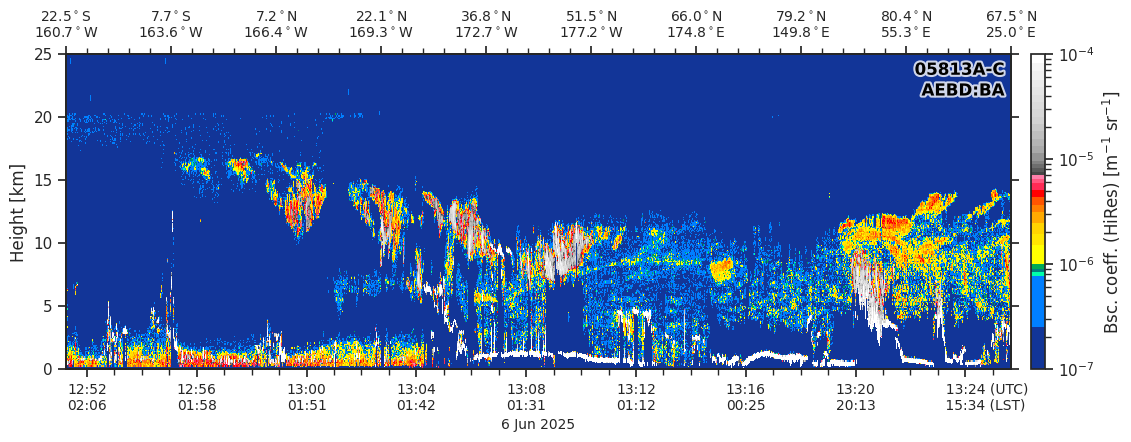

In [20]:
print("Plot the full orbit:")
cf = eck.CurtainFigure()
cf = cf.ecplot(
    ds=ds,
    var="particle_backscatter_coefficient_355nm",
    height_range=(0, 25e3),
)

In [ ]:
print("Show only transition between 1st and 2nd frame:")
with eck.read_products(df, zoom_at=0.5) as ds:
    cf = eck.CurtainFigure()
    cf = cf.ecplot(
        ds=ds,
        var="particle_backscatter_coefficient_355nm",
        height_range=(0, 25e3),
    )